In [1]:
from gen_mat import *
import scipy
import numpy as np
%matplotlib inline

# Check polinomial norm

In [2]:
# Hermite
def int_herm(n, m):
    return scipy.integrate.quad(lambda x: herm(x, n)*herm(x, m)*np.exp(-x*x/2), -np.inf, np.inf, 
                     epsabs=1e-14, epsrel=1e-14, limit=1000)
print ( int_herm(4, 4) )
print ( int_herm(4, 7) )
print ( int_herm(0, 0) )

(0.9999999999999998, 1.0718223110245808e-14)
(0.0, 0.0)
(0.9999999999999998, 1.121483214624735e-14)


/home/gleb/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


In [3]:
# Chebyshevf
def int_cheb(n, m):
    return( scipy.integrate.quad(lambda x: cheb(x, n)*cheb(x, m)*1/np.sqrt(1-x*x), -1.0, 1.0, 
                     epsabs=1e-14, epsrel=1e-14, limit=1000) )
print ( int_cheb(6, 6) )
print ( int_cheb(6, 9) )
print ( int_cheb(0, 0) )


(1.5707963267951377, 1.9520827012134423e-13)
(0.0, 1.3295393188062837e-14)
(3.1415926535899614, 7.809725088847586e-14)


/home/gleb/anaconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


# Some Plots

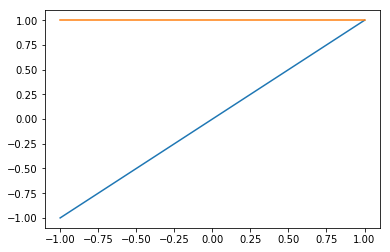

In [4]:
x = np.linspace(-1,1,1000)
plt.plot(x, cheb(x, 1))
plt.plot(x, cheb_diff(x, 1))

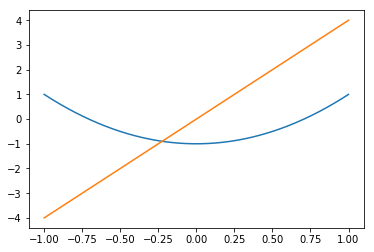

In [5]:
plt.plot(x, cheb(x, 2))
plt.plot(x, cheb_diff(x, 2))

# Main Matrix

In [19]:
# hermit, 1D
l = 1
n2 = 6
n_size = 5
x = np.random.rand(n2, l)
print x.shape
print ( x.T )
A = GenMat(n_size, x, poly=herm, poly_diff=herm_diff, debug=True)
print ( '' ) 
print( A )
print ( 'Diagonal:' ) 
for i in xrange(min(n2, n_size)):
    print ( herm(x[i][0], i) )
print ( '' ) 


(6, 1)
[[ 0.04376425  0.6335717   0.69256842  0.95368574  0.50423388  0.88627429]]
number of vars(n2) = 6, dim of space (number of derivatives, l) = 1,  number of monoms(n_size) = 5
monom #0 is (0,)
monom #1 is (1,)
monom #2 is (2,)
monom #3 is (3,)
monom #4 is (4,)

[[ 0.63161878  0.02764232 -0.4457665  -0.03383318  0.38530477]
 [ 0.63161878  0.40017578 -0.26734203 -0.42453395  0.09703864]
 [ 0.63161878  0.43743922 -0.23239926 -0.45009353  0.04540338]
 [ 0.63161878  0.60236582 -0.04041192 -0.51408087 -0.21013805]
 [ 0.63161878  0.31848359 -0.33306749 -0.35700322  0.19843835]
 [ 0.63161878  0.55978748 -0.09580839 -0.50608883 -0.14129426]
 [ 0.          0.63161878  0.03909214 -0.77209023 -0.06766635]
 [ 0.          0.63161878  0.56593402 -0.46304998 -0.84906789]
 [ 0.          0.63161878  0.61863248 -0.40252733 -0.90018706]
 [ 0.          0.63161878  0.85187391 -0.0699955  -1.02816174]
 [ 0.          0.63161878  0.45040381 -0.57688982 -0.71400645]
 [ 0.          0.63161878  0.79165905 -

In [20]:
# hermit, 2D
l = 2
n2 = 6
n_size = 5
x = np.random.rand(n2, l)
print x.shape
print ( x.T )
A = GenMat(n_size, x, poly=herm, poly_diff=herm_diff, debug=True)
print ( '' ) 
print( A )


(6, 2)
[[ 0.98280933  0.62252771  0.32302508  0.57766538  0.57915648  0.22665757]
 [ 0.3944013   0.82665297  0.13502413  0.12556888  0.89086444  0.65579462]]
number of vars(n2) = 6, dim of space (number of derivatives, l) = 2,  number of monoms(n_size) = 5
monom #0 is (0, 0)
monom #1 is (0, 1)
monom #2 is (1, 0)
monom #3 is (1, 1)
monom #4 is (2, 0)

[[ 0.39894228  0.15734335  0.3920842   0.15463852 -0.00961543]
 [ 0.39894228  0.32978682  0.24835263  0.20530143 -0.17277156]
 [ 0.39894228  0.05386683  0.12886836  0.01740034 -0.25265955]
 [ 0.39894228  0.05009473  0.23045514  0.02893799 -0.18796052]
 [ 0.39894228  0.35540349  0.23105001  0.20583424 -0.18747393]
 [ 0.39894228  0.2616242   0.09042329  0.05929911 -0.26760255]
 [ 0.          0.          0.39894228  0.15734335  0.55449079]
 [ 0.          0.          0.39894228  0.32978682  0.35122365]
 [ 0.          0.          0.39894228  0.05386683  0.18224738]
 [ 0.          0.          0.39894228  0.05009473  0.32591279]
 [ 0.          0.

In [21]:
# cheb, 1D
l = 1
n2 = 6
n_size = 5
x = np.random.rand(n2, l)
print x.shape
print ( x.T )
A = GenMat(n_size, x, poly=cheb, poly_diff=cheb_diff, debug=True)
print ( '' ) 
print( A )
print ( 'Diagonal:' ) 
for i in xrange(min(n2, n_size)):
    print ( cheb(x[i][0], i) )
print ( '' ) 

(6, 1)
[[ 0.23700684  0.04355523  0.01944713  0.26171293  0.85297898  0.12450653]]
number of vars(n2) = 6, dim of space (number of derivatives, l) = 1,  number of monoms(n_size) = 5
monom #0 is (0,)
monom #1 is (1,)
monom #2 is (2,)
monom #3 is (3,)
monom #4 is (4,)

[[ 1.          0.23700684 -0.88765551 -0.6577677   0.57586462]
 [ 1.          0.04355523 -0.99620588 -0.13033518  0.98485233]
 [ 1.          0.01944713 -0.99924362 -0.05831198  0.99697562]
 [ 1.          0.26171293 -0.86301268 -0.71343609  0.48958178]
 [ 1.          0.85297898  0.45514626 -0.07651859 -0.58568376]
 [ 1.          0.12450653 -0.96899625 -0.36579925  0.87790745]
 [ 0.          1.          0.94802737 -2.32593308 -3.36608689]
 [ 0.          1.          0.17422091 -2.97723531 -0.69423959]
 [ 0.          1.          0.07778853 -2.99546171 -0.31091876]
 [ 0.          1.          1.04685173 -2.17807609 -3.61378527]
 [ 0.          1.          3.4119159   5.73087758  6.2116831 ]
 [ 0.          1.          0.49802612 -

In [22]:
# cheb, 2D
l = 2
n2 = 7
n_size = 6
x = np.random.rand(n2, l)
print x.shape
print ( x.T )
A = GenMat(n_size, x, poly=cheb, poly_diff=cheb_diff, debug=True)
print ( '' ) 
print( A )

(7, 2)
[[ 0.52401991  0.60065504  0.88078313  0.00966555  0.06426964  0.48734396
   0.18291814]
 [ 0.21872594  0.05435907  0.72584291  0.83642334  0.26672726  0.2419708
   0.23676603]]
number of vars(n2) = 7, dim of space (number of derivatives, l) = 2,  number of monoms(n_size) = 6
monom #0 is (0, 0)
monom #1 is (0, 1)
monom #2 is (1, 0)
monom #3 is (1, 1)
monom #4 is (2, 0)
monom #5 is (0, 2)

[[ 1.          0.21872594  0.52401991  0.11461675 -0.45080627 -0.90431793]
 [ 1.          0.05435907  0.60065504  0.03265105 -0.27842704 -0.99409018]
 [ 1.          0.72584291  0.88078313  0.63931019  0.55155785  0.05369585]
 [ 1.          0.83642334  0.00966555  0.00808449 -0.99981315  0.39920801]
 [ 1.          0.26672726  0.06426964  0.01714247 -0.99173883 -0.85771314]
 [ 1.          0.2419708   0.48734396  0.11792301 -0.52499173 -0.88290026]
 [ 1.          0.23676603  0.18291814  0.0433088  -0.93308191 -0.88788369]
 [ 0.          0.          1.          0.21872594  2.09607964 -0.        ]
 

# Check drivatives

In [16]:
import sympy as sp
x_s, n_s = sp.symbols("x n")

In [17]:
print [(sp.simplify(sp.diff(herm(x_s, i), x_s) - herm_diff(x_s, i))) for i in xrange(5)]
print 
[(sp.simplify(herm(x_s, i)), herm_diff(x_s, i)) for i in xrange(5)]

[0, 0, -2.22044604925031e-16*x, 1.11022302462516e-16*x**2, x*(-1.11022302462516e-16*x**2 + 2.22044604925031e-16)]



[(0.631618777746065, 0),
 (0.631618777746065*x, 0.631618777746065),
 (0.446621920869001*x**2 - 0.446621920869001, 0.893243841738002*x),
 (x*(0.257857286239706*x**2 - 0.773571858719117),
  0.773571858719117*x**2 - 0.773571858719117),
 (0.128928643119853*x**4 - 0.773571858719117*x**2 + 0.386785929359558,
  0.257857286239706*x*(2.0*x**2 - 4.0) - 0.515714572479411*x)]

In [18]:
print [(sp.simplify(sp.diff(cheb(x_s, i), x_s) - cheb_diff(x_s, i))) for i in xrange(5)]
print 
[(sp.simplify(cheb(x_s, i)), cheb_diff(x_s, i)) for i in xrange(5)]

[0, 0, 0, 0, 0]



[(1.00000000000000, 0),
 (1.0*x, 1.00000000000000),
 (2.0*x**2 - 1.0, 4.0*x),
 (x*(4.0*x**2 - 3.0), 12.0*x**2 - 3.0),
 (8.0*x**4 - 8.0*x**2 + 1.0, 32.0*x**3 - 16.0*x)]